# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


110

In [15]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = 'salalah'
units = "imperial"

# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q={city}" 
query_url

temp=[]
city=[]


# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
temp.append(weather_json["main"]["temp"])
city.append(weather_json["name"])


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

temp=[]
city=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
windspeed=[]
counter =0

print('Beginning Data Retrieval\n-----------------------------')
for i in range(len(cities)):
    counter = counter +1
    try:
        print(f"Processing Record {i} of Set 1|{cities[i]}")
    
        # Build query URL
        query_url = f"{url}appid={api_key}&units={units}&q={cities[i]}" 

        # Get weather data and convert to json file
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        #appeding to list of city and temp
        temp.append(weather_json["main"]["temp"])
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        maxtemp.append(weather_json["main"]["temp_max"])
        windspeed.append(weather_json["wind"]["speed"])
        
        
    except(KeyError, IndexError):
         print(f"City not found....... Skipping...........{cities[i]}")
    if counter == 100:
        time.sleep(60)
        counter = 0

print("-----------------------------\nData Retrieval Complete\n-----------------------------")   

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1|abu zabad
Processing Record 1 of Set 1|busselton
Processing Record 2 of Set 1|punta arenas
Processing Record 3 of Set 1|high rock
Processing Record 4 of Set 1|vaini
Processing Record 5 of Set 1|rikitea
Processing Record 6 of Set 1|san patricio
Processing Record 7 of Set 1|provideniya
Processing Record 8 of Set 1|martapura
Processing Record 9 of Set 1|ventsy
Processing Record 10 of Set 1|saint-avold
Processing Record 11 of Set 1|namwala
Processing Record 12 of Set 1|bluff
Processing Record 13 of Set 1|saint-philippe
Processing Record 14 of Set 1|namatanai
Processing Record 15 of Set 1|eyl
Processing Record 16 of Set 1|naze
Processing Record 17 of Set 1|tasiilaq
Processing Record 18 of Set 1|hilo
Processing Record 19 of Set 1|albany
Processing Record 20 of Set 1|ribeira grande
Processing Record 21 of Set 1|geraldton
Processing Record 22 of Set 1|khatanga
Processing Record 23 of Set 1|mataura
Processing Re

# Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [19]:
new_df ={}
new_df.update({"City Name":city})
new_df.update({"Temp":temp})
new_df.update({"Cloudiness": cloudiness})
new_df.update({"Country": country})
new_df.update({"Date":date})
new_df.update({"Humidity":humidity})
new_df.update({"Latitud":lat})
new_df.update({"Longitud":lng})
new_df.update({"Max Temp":maxtemp})
new_df.update({"Wind Speed":windspeed})

new_df= pd.DataFrame(new_df)
new_df

,City Name,Temp,Cloudiness,Country,Date,Humidity,Latitud,Longitud,Max Temp,Wind Speed
0,Abu Zabad,77.86,29,SD,1571093380,72,12.35,29.25,77.86,1.39
1,Busselton,44.01,21,AU,1571093306,64,-33.64,115.35,44.01,10.85
2,Punta Arenas,46.20,20,CL,1571093310,70,-53.16,-70.91,46.40,4.70
3,High Rock,79.00,60,BS,1571093381,71,26.63,-78.28,79.00,10.24
4,Vaini,70.36,71,IN,1571093381,95,15.34,74.49,70.36,8.22
...,...,...,...,...,...,...,...,...,...,...
91,Pevek,31.91,100,RU,1571093470,69,69.70,170.27,31.91,6.66
92,Nikolskoye,40.48,90,RU,1571093300,86,59.70,30.79,41.00,6.71
93,Kapaa,83.84,75,US,1571093315,74,22.08,-159.32,86.00,12.75
94,Bani,85.93,62,YE,1571093471,67,16.02,42.93,85.93,1.88


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

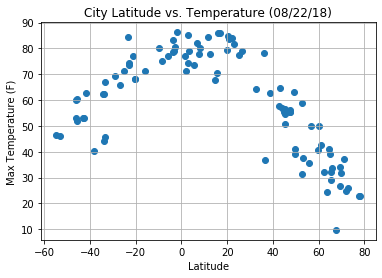

In [20]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitud"], new_df["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (10/14/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVs.TemperaturePlot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

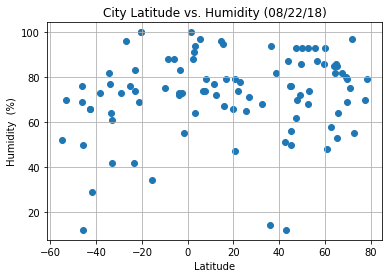

In [21]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitud"], new_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (10/14/18)")
plt.ylabel("Humidity  (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVs.HumidityPlot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

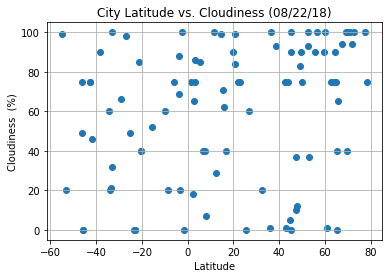

In [22]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitud"], new_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10/14/18)")
plt.ylabel("Cloudiness  (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVs.CloudinessPlot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

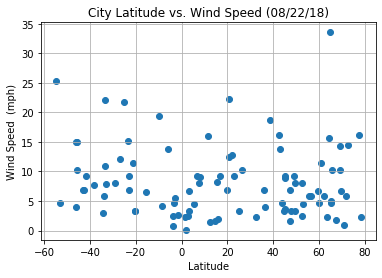

In [23]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitud"], new_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10/14/18)")
plt.ylabel("Wind Speed  (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVs.WindSpeedPlot.png")

# Show plot
plt.show()